In [1]:
import numpy as np;
print("abc")


abc


In [2]:
# import keras 
# import os
# import glob 
# import cv2
# from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img
# import matplotlib.pyplot as plt

# target_size = (224,224)
# fruits = ["Apple_Bad", "Apple_Good", "Banana_Bad", "Banana_Good", "Guava_Bad", "Guava_Good", "Lime_Bad", 
#           "Lime_Good", "Orange_Bad", "Orange_Good", "Pomegranate_Bad", "Pomegranate_Good"]


# for fruit in fruits:
#     img_dir = f'C:\\Users\\rouna\\OneDrive\\Desktop\\ML\\citrus\\Top Indian Fruits Dataset_Clean Images\\Top Indian Fruits Dataset_Clean Images\\FruitDataSet of 256x256 Size_12000 Images\\{fruit}'
#     data_path = os.path.join(img_dir, '*g')  # global path of the img_dir.....
#     files = glob.glob(data_path)  # all the files inside the data path is here...
    
#     save_dir = f'C:\\Users\\rouna\\OneDrive\\Desktop\\ML\\citrus\\Top Indian Fruits Dataset_Clean Images\\India\\{fruit}'
#     if not os.path.exists(save_dir):
#         os.makedirs(save_dir)

#     datagen = ImageDataGenerator(
#         rotation_range=40,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         fill_mode='nearest'
#     )

#     for f1 in files:
#         img = load_img(f1, target_size=target_size)
#         x = img_to_array(img)
#         x = x.reshape((1,) + x.shape)

#         i = 0
#         path, dir, files = next(os.walk(img_dir))
#         file_counts = len(files)
#         for batch in datagen.flow(x, batch_size=1, save_to_dir=save_dir, save_prefix='a',
#                                   save_format='jpg'):
#             i += 1
#             if i == 5:  # from each image 10 images will be generated in a new file
#                 break

In [1]:
import os
import shutil
import random
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
dir_path = "C:\\Users\\rouna\\OneDrive\\Desktop\\ML\\citrus\\Top Indian Fruits Dataset_Clean Images\\Top Indian Fruits Dataset_Clean Images\\FruitDataSet of 256x256 Size_12000 Images"
# Define the classes

classes = ["Apple_Bad", "Apple_Good", "Banana_Bad", "Banana_Good", "Guava_Bad", "Guava_Good", "Lime_Bad", 
          "Lime_Good", "Orange_Bad", "Orange_Good", "Pomegranate_Bad", "Pomegranate_Good"]
# Define the training and testing directories

train_dir = "C:\\Users\\rouna\\OneDrive\\Desktop\\ML\\citrus\\Top Indian Fruits Dataset_Clean Images\\Top Indian Fruits Dataset_Clean Images\\FruitDataSet of 256x256 Size_12000 Images\\train_dir"
test_dir = "C:\\Users\\rouna\\OneDrive\\Desktop\\ML\\citrus\\Top Indian Fruits Dataset_Clean Images\\Top Indian Fruits Dataset_Clean Images\\FruitDataSet of 256x256 Size_12000 Images\\test_dir"
# Create the training and testing directories

if not os.path.exists(train_dir):
    os.makedirs(train_dir)

if not os.path.exists(test_dir):
    os.makedirs(test_dir)

for class_name in classes:
    class_dir = os.path.join(dir_path, class_name)
    image_files = [os.path.join(class_dir, f) for f in os.listdir(class_dir) if f.endswith(".jpg") or f.endswith(".png")]
    train_files, test_files = train_test_split(image_files, test_size=0.1, random_state=42)
    # Copy the training files to the training directory
    for file_path in train_files:
        file_name = os.path.basename(file_path)
        new_file_path = os.path.join(train_dir, class_name, file_name)
        if not os.path.exists(os.path.join(train_dir, class_name)):
            os.makedirs(os.path.join(train_dir, class_name))
        shutil.copy(file_path, new_file_path)
    # Copy the testing files to the testing directory
    for file_path in test_files:
        file_name = os.path.basename(file_path)
        new_file_path = os.path.join(test_dir, class_name, file_name)
        if not os.path.exists(os.path.join(test_dir, class_name)):
            os.makedirs(os.path.join(test_dir, class_name))
        shutil.copy(file_path, new_file_path)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
#from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K

In [4]:
def get_data(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels

X_train, Y_train, labels = get_data(train_dir)
X_test, Y_test,_ = get_data(test_dir)

In [5]:
from keras.utils import to_categorical

In [6]:
Y_train = to_categorical(Y_train, 12)
Y_test = to_categorical(Y_test, 12)

In [7]:
X_train, X_val = train_test_split(X_train, test_size=0.2, random_state=33)
Y_train, Y_val = train_test_split(Y_train, test_size=0.2, random_state=33)

In [8]:
import keras 
import os
import glob 
import cv2
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img
import matplotlib.pyplot as plt

def convert_image_to_array(files, target_size):
    images_as_array = []
    for file in files:
        img = load_img(file, target_size=target_size)  # Load and resize the image
        img_array = img_to_array(img)
        images_as_array.append(img_array)
    return images_as_array

# Define the target size for resizing

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)










target_size = (224, 224)

# Convert images to arrays
X_train = np.array(convert_image_to_array(X_train, target_size))
X_val = np.array(convert_image_to_array(X_val, target_size))
X_test = np.array(convert_image_to_array(X_test, target_size))



X_train = X_train.astype('float32')/255
X_val = X_val.astype('float32')/255
X_test = X_test.astype('float32')/255


(8640,)
(1200,)
(2160,)


In [9]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense, Attention, Input

# Define the CNN model with attention
input_layer = Input(shape=(224, 224, 3))

# Convolutional layers
x = Conv2D(filters=16, kernel_size=2, padding='same')(input_layer)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=32, kernel_size=2, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=64, kernel_size=2, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=2, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2)(x)

# Applying attention after the last convolutional layer
attention = Attention()([x, x])

# Fully connected layers
x = Dropout(0.3)(attention)
x = Flatten()(x)
x = Dense(150, activation='relu')(x)
x = Dropout(0.4)(x)
output_layer = Dense(12, activation='softmax')(x)

# Creating the model with attention
model_with_attention = Model(inputs=input_layer, outputs=output_layer)

# Displaying the summary of the model
model_with_attention.summary()




Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 224, 224, 16)         208       ['input_1[0][0]']             
                                                                                                  
 activation (Activation)     (None, 224, 224, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)         0         ['activation[0][0]']          
 D)                                                                                         

In [20]:
from keras.optimizers import SGD, Adam, RMSprop

optimizer = Adam()
model_with_attention.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [21]:


# fitting model using above defined layers 
history = model_with_attention.fit(X_train,Y_train,
        batch_size = 128,
        epochs=20,
        validation_data=(X_val, Y_val),
        verbose=2, shuffle=True)

Epoch 1/20


68/68 - 81s - loss: 1.5207 - accuracy: 0.4918 - val_loss: 0.5236 - val_accuracy: 0.8384 - 81s/epoch - 1s/step
Epoch 2/20
68/68 - 56s - loss: 0.5169 - accuracy: 0.8343 - val_loss: 0.2122 - val_accuracy: 0.9347 - 56s/epoch - 823ms/step
Epoch 3/20
68/68 - 52s - loss: 0.2766 - accuracy: 0.9116 - val_loss: 0.1452 - val_accuracy: 0.9537 - 52s/epoch - 762ms/step
Epoch 4/20
68/68 - 52s - loss: 0.1954 - accuracy: 0.9396 - val_loss: 0.1068 - val_accuracy: 0.9667 - 52s/epoch - 760ms/step
Epoch 5/20
68/68 - 52s - loss: 0.1473 - accuracy: 0.9516 - val_loss: 0.0938 - val_accuracy: 0.9718 - 52s/epoch - 760ms/step
Epoch 6/20
68/68 - 52s - loss: 0.1383 - accuracy: 0.9574 - val_loss: 0.0643 - val_accuracy: 0.9815 - 52s/epoch - 768ms/step
Epoch 7/20
68/68 - 52s - loss: 0.0942 - accuracy: 0.9691 - val_loss: 0.0611 - val_accuracy: 0.9810 - 52s/epoch - 764ms/step
Epoch 8/20
68/68 - 53s - loss: 0.0947 - accuracy: 0.9694 - val_loss: 0.0454 - val_accuracy: 0.9847 - 53s/epoch - 777ms/step
Epoch 9/2

In [22]:
score = model_with_attention.evaluate(X_test, Y_test)
print('Test accuracy:', score[1])

38/38 [==============================] - 3s 66ms/step - loss: 0.0267 - accuracy: 0.9900
Test accuracy: 0.9900000095367432


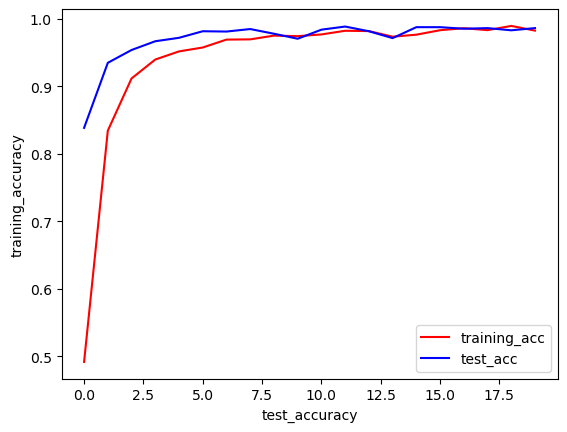

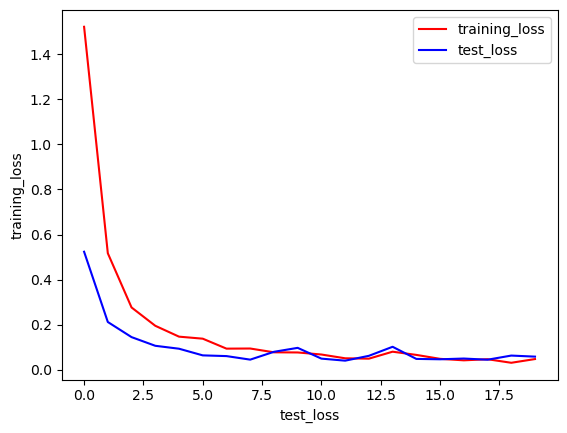

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color = 'red',label = 'training_acc')
plt.plot(history.history['val_accuracy'],color = 'blue',label = 'test_acc')
plt.ylabel('training_accuracy')
plt.xlabel('test_accuracy')
plt.legend()
plt.show()




plt.plot(history.history['loss'],color = 'red',label = 'training_loss')
plt.plot(history.history['val_loss'],color = 'blue',label = 'test_loss')
plt.ylabel('training_loss')
plt.xlabel('test_loss')
plt.legend()
plt.show()


In [24]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions on test set
Y_pred = model_with_attention.predict(X_test)
# Convert predictions to one-hot encoded labels
Y_pred_labels = np.argmax(Y_pred, axis=1)
Y_true_labels = np.argmax(Y_test, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_true_labels, Y_pred_labels)

# Classification Report
class_report = classification_report(Y_true_labels, Y_pred_labels)

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)


38/38 [==============================] - 2s 55ms/step
Confusion Matrix:
[[100   0   0   0   0   0   0   0   0   0   0   0]
 [  0  95   1   0   0   1   1   0   0   1   0   1]
 [  0   0 100   0   0   0   0   0   0   0   0   0]
 [  0   0   0 100   0   0   0   0   0   0   0   0]
 [  0   0   0   0 100   0   0   0   0   0   0   0]
 [  0   4   0   0   0  96   0   0   0   0   0   0]
 [  0   0   0   0   0   0  99   0   1   0   0   0]
 [  0   0   0   0   0   0   0 100   0   0   0   0]
 [  0   0   0   0   0   0   0   0  98   2   0   0]
 [  0   0   0   0   0   0   0   0   0 100   0   0]
 [  0   0   0   0   0   0   0   0   0   0 100   0]
 [  0   0   0   0   0   0   0   0   0   0   0 100]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       0.96      0.95      0.95       100
           2       0.99      1.00      1.00       100
           3       1.00      1.00      1.00       100
           4       1